In [15]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, InceptionV3, Xception, VGG16, EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [2]:
# Paths to the dataset
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train/'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val/'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test/'

In [3]:
# Image size for ResNet50
IMG_SIZE = 224
BATCH_SIZE = 32

In [4]:
# Preprocessing function from ResNet50
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [5]:
val_test_datagen = ImageDataGenerator(rescale=1./255)


In [6]:
# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Since it's a binary classification problem
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [7]:
# Class names for the confusion matrix
class_names = ['Normal', 'Pneumonia']

In [8]:
# Dictionary to store models
models = {
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    'InceptionV3': InceptionV3(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    'Xception': Xception(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    'EfficientNetB0': EfficientNetB0(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
}

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training ResNet50...
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 177s 715ms/step - accuracy: 0.8466 - loss: 0.3155 - val_accuracy: 0.5000 - val_loss: 1.8164
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 691ms/step - accuracy: 0.9737 - loss: 0.0759 - val_accuracy: 0.5000 - val_loss: 2.4593
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 119s 696ms/step - accuracy: 0.9768 - loss: 0.0627 - val_accuracy: 0.5000 - val_loss: 1.8897
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 687ms/step - accuracy: 0.9827 - loss: 0.0513 - val_accuracy: 0.6250 - val_loss: 1.2630
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 688ms/step - accuracy: 0.9814 - loss: 0.0504 - val_accuracy: 0.6875 - val_loss: 0.6551


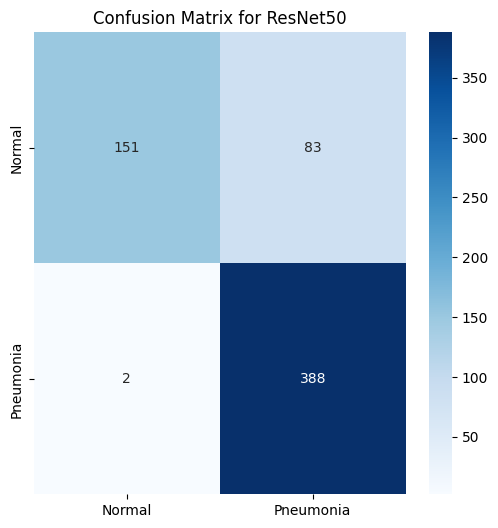

Training InceptionV3...
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 204s 733ms/step - accuracy: 0.7807 - loss: 0.4617 - val_accuracy: 0.5625 - val_loss: 1.0647
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 693ms/step - accuracy: 0.9276 - loss: 0.1867 - val_accuracy: 0.5625 - val_loss: 1.6485
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 694ms/step - accuracy: 0.9450 - loss: 0.1454 - val_accuracy: 0.6250 - val_loss: 1.1376
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 695ms/step - accuracy: 0.9560 - loss: 0.1239 - val_accuracy: 0.8125 - val_loss: 0.3585
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 686ms/step - accuracy: 0.9639 - loss: 0.0997 - val_accuracy: 0.8750 - val_loss: 0.2407


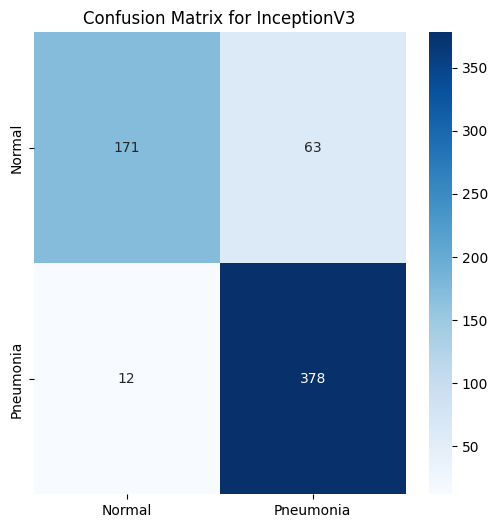

Training Xception...
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 177s 741ms/step - accuracy: 0.7440 - loss: 0.5137 - val_accuracy: 0.5000 - val_loss: 0.8530
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 121s 709ms/step - accuracy: 0.9206 - loss: 0.2319 - val_accuracy: 0.5625 - val_loss: 1.0363
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 121s 707ms/step - accuracy: 0.9549 - loss: 0.1318 - val_accuracy: 0.6875 - val_loss: 0.6784
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 120s 705ms/step - accuracy: 0.9629 - loss: 0.1094 - val_accuracy: 0.8750 - val_loss: 0.3620
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 120s 707ms/step - accuracy: 0.9687 - loss: 0.0846 - val_accuracy: 0.8750 - val_loss: 0.2454


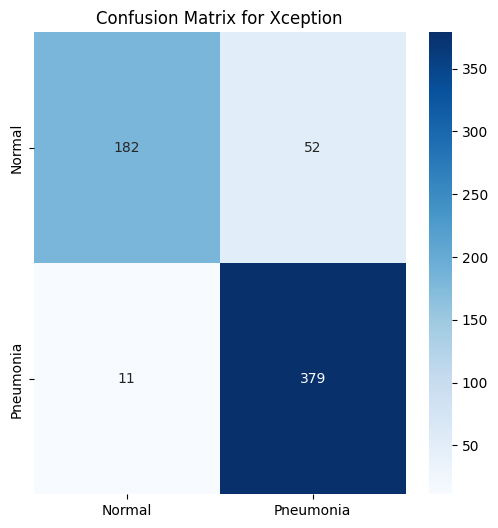

Training VGG16...
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 148s 727ms/step - accuracy: 0.6795 - loss: 0.5361 - val_accuracy: 0.6250 - val_loss: 1.2014
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 120s 706ms/step - accuracy: 0.9131 - loss: 0.2031 - val_accuracy: 0.6250 - val_loss: 1.4000
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 119s 697ms/step - accuracy: 0.9445 - loss: 0.1471 - val_accuracy: 0.7500 - val_loss: 0.8249
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 692ms/step - accuracy: 0.9515 - loss: 0.1274 - val_accuracy: 0.7500 - val_loss: 0.4859
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 118s 691ms/step - accuracy: 0.9648 - loss: 0.0958 - val_accuracy: 0.7500 - val_loss: 0.4555


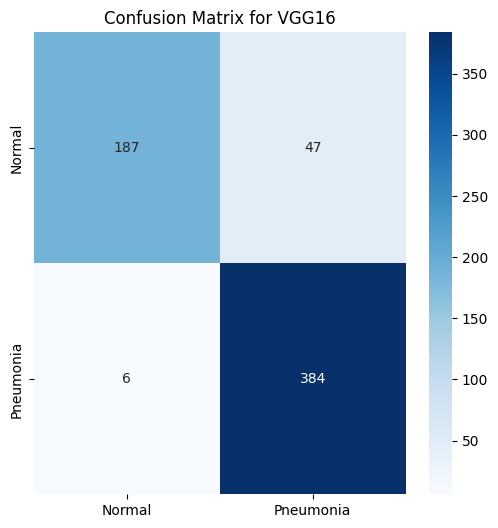

Training EfficientNetB0...
Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 216s 730ms/step - accuracy: 0.6765 - loss: 0.5756 - val_accuracy: 0.5000 - val_loss: 0.7325
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 688ms/step - accuracy: 0.9105 - loss: 0.2663 - val_accuracy: 0.5000 - val_loss: 0.9205
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 688ms/step - accuracy: 0.9329 - loss: 0.1921 - val_accuracy: 0.5000 - val_loss: 0.8510
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 116s 682ms/step - accuracy: 0.9485 - loss: 0.1525 - val_accuracy: 0.6875 - val_loss: 0.5624
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 117s 689ms/step - accuracy: 0.9526 - loss: 0.1200 - val_accuracy: 0.9375 - val_loss: 0.3303


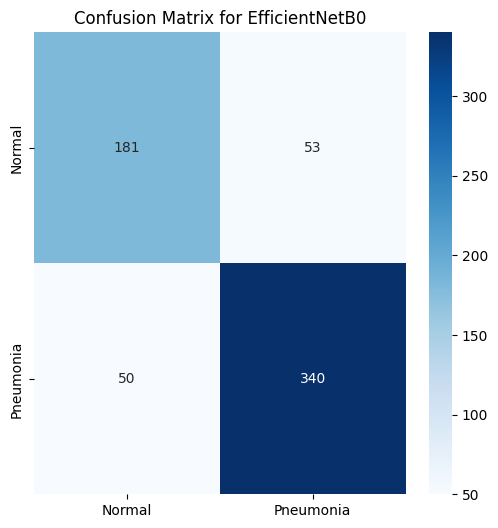

In [12]:

metrics_dict = {}

history_dict = {}

model_dict = {}



# Loop through each model and train
for model_name, base_model in models.items():
    # Freeze the layers of the base model
    for layer in base_model.layers[-10:]:
        layer.trainable = True

    # Add custom top layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)

    # Create the full model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])
    
    print(f"Training {model_name}...")

    # Train the model
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=5
    )
    
    model_dict[model_name] = model

    # Store history for plotting later
    history_dict[model_name] = history

    # Evaluate the model
    final_test_loss, final_test_acc = model.evaluate(test_generator, verbose=0)

    # Generate predictions for the confusion matrix
    y_pred = model.predict(test_generator, verbose=0)
    y_pred_classes = (y_pred > 0.5).astype(int)

    # Calculate precision, recall, and F1 score
    precision = precision_score(test_generator.classes, y_pred_classes)
    recall = recall_score(test_generator.classes, y_pred_classes)
    f1 = f1_score(test_generator.classes, y_pred_classes)

    # Store the metrics in a dictionary using dynamic keys
    metrics_dict[f'precision_{model_name}'] = precision
    metrics_dict[f'recall_{model_name}'] = recall
    metrics_dict[f'f1_{model_name}'] = f1
    metrics_dict[f'final_test_acc_{model_name}'] = final_test_acc
    metrics_dict[f'final_test_loss_{model_name}'] = final_test_loss


    # Generate confusion matrix and plot
    cm = confusion_matrix(test_generator.classes, y_pred_classes)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


In [22]:
# Function to filter out unwanted entries and print formatted metrics
def print_cleaned_metrics(metrics_dict):
    # Extract unique model names
    model_names = set(key.split('_')[1] for key in metrics_dict.keys() if 'test' not in key)

    # Print header
    print(f"{'Model':<15} {'Precision':<10} {'Recall':<10} {'F1 Score':<10} {'Test Acc':<10} {'Test Loss':<10}")
    print("-" * 70)

    # Print the metrics for each model
    for model in model_names:
        precision = metrics_dict.get(f'precision_{model}', 0)
        recall = metrics_dict.get(f'recall_{model}', 0)
        f1 = metrics_dict.get(f'f1_{model}', 0)
        final_test_acc = metrics_dict.get(f'final_test_acc_{model}', 0)
        final_test_loss = metrics_dict.get(f'final_test_loss_{model}', 0)
        
        print(f"{model:<15} {precision:<10.4f} {recall:<10.4f} {f1:<10.4f} {final_test_acc:<10.4f} {final_test_loss:<10.4f}")

In [25]:
# Print all the cleaned metrics
print("\nAll stored metrics:")
print_cleaned_metrics(metrics_dict)


All stored metrics:
Model           Precision  Recall     F1 Score   Test Acc   Test Loss 
----------------------------------------------------------------------
EfficientNetB0  0.8651     0.8718     0.8685     0.8349     0.3684    
VGG16           0.8910     0.9846     0.9354     0.9151     0.2593    
InceptionV3     0.8571     0.9692     0.9097     0.8798     0.3127    
ResNet50        0.8238     0.9949     0.9013     0.8638     0.3963    
Xception        0.8794     0.9718     0.9233     0.8990     0.2464    


In [26]:
# Plotly comparison for accuracy
fig_acc = sp.make_subplots(rows=1, cols=1, subplot_titles=["Model Comparison: Training Accuracy"])

for model_name, history in history_dict.items():
    fig_acc.add_trace(go.Scatter(x=list(range(1, len(history.history['accuracy']) + 1)),
                                 y=history.history['accuracy'],
                                 mode='lines+markers',
                                 name=f'{model_name} Training Accuracy'))

fig_acc.update_layout(title='Training Accuracy Comparison',
                      xaxis_title='Epochs',
                      yaxis_title='Accuracy',
                      template='plotly_dark')
fig_acc.show()

In [27]:
# Plotly comparison for loss
fig_loss = sp.make_subplots(rows=1, cols=1, subplot_titles=["Model Comparison: Training Loss"])

for model_name, history in history_dict.items():
    fig_loss.add_trace(go.Scatter(x=list(range(1, len(history.history['loss']) + 1)),
                                  y=history.history['loss'],
                                  mode='lines+markers',
                                  name=f'{model_name} Training Loss'))

fig_loss.update_layout(title='Training Loss Comparison',
                       xaxis_title='Epochs',
                       yaxis_title='Loss',
                       template='plotly_dark')
fig_loss.show()

In [32]:
# Dictionary to store the AUC for each model
auc_dict = {}

# Loop through each model and calculate ROC and AUC
for model_name, model in model_dict.items():
    # Generate predictions for the test set
    y_pred_prob = model.predict(test_generator).ravel()  # Get the probabilities

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(test_generator.classes, y_pred_prob)

    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    auc_dict[model_name] = roc_auc

    # Create a Plotly figure for the ROC curve
    fig = go.Figure()

    # Add the ROC curve
    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode='lines', name=f'ROC curve (AUC = {roc_auc:.2f})', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line=dict(color='red', dash='dash')))

    # Update layout
    fig.update_layout(
        title=f'Receiver Operating Characteristic for {model_name}',
        xaxis_title='False Positive Rate',
        yaxis_title='True Positive Rate',
        xaxis=dict(range=[0, 1]),
        yaxis=dict(range=[0, 1]),
        showlegend=True,
        template='plotly_dark'
    )

    # Show the figure
    fig.show()

    # Print AUC score
    print(f"{model_name} AUC: {roc_auc:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 256ms/step


ResNet50 AUC: 0.9586
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step


InceptionV3 AUC: 0.9560
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 241ms/step


Xception AUC: 0.9685
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step


VGG16 AUC: 0.9788
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step


EfficientNetB0 AUC: 0.9102


In [46]:
# Prepare data for plotting
model_names = []
precision_values = []
recall_values = []
f1_values = []
test_acc_values = []



for key, value in metrics_dict.items():
    if key.startswith('precision_'):
        model_names.append(key.split('_')[1])
        precision_values.append(value)
    elif key.startswith('recall_'):
        recall_values.append(value)
    elif key.startswith('f1_'):
        f1_values.append(value)
    elif key.startswith('final_test_acc_'):
        test_acc_values.append(value)


In [51]:
# Create a bar chart
fig = go.Figure()

# Add traces for each metric
fig.add_trace(go.Bar(
    x=model_names,
    y=precision_values,
    name='Precision',
    marker_color='blue'
))

fig.add_trace(go.Bar(
    x=model_names,
    y=recall_values,
    name='Recall',
    marker_color='orange'
))

fig.add_trace(go.Bar(
    x=model_names,
    y=f1_values,
    name='F1 Score',
    marker_color='green'
))

fig.add_trace(go.Bar(
    x=model_names,
    y=test_acc_values,
    name='Test Accuracy',
    marker_color='yellow'
))

# Update layout
fig.update_layout(
    title='Model Metrics Comparison',
    xaxis_title='Models',
    yaxis_title='Scores',
    barmode='group',
    template='plotly_dark',
    yaxis=dict(range=[0, 1]),
    showlegend=True
)

fig.show()

In [54]:
model_dict['ResNet50'].summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 76,954,501 (293.56 MB)

 Trainable params: 25,633,793 (97.79 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 51,267,588 (195.57 MB)

In [55]:
model_dict['EfficientNetB0'].summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer_4[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 16,002,976 (61.05 MB)

 Trainable params: 5,320,317 (20.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

 Optimizer params: 10,640,636 (40.59 MB)

In [56]:
model_dict['Xception'].summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 111, 111,  │        864 │ input_layer_2[0]… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 111, 111,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 111, 111,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 109, 109,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 109, 109,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 109, 109,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 109, 109,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 109, 109,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 109, 109,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 109, 109,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 109, 109,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 55, 55,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 55, 55,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 55, 55,    │        512 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 55, 55,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 55, 55,    │          0 │ add[0][0]       

 Total params: 68,772,989 (262.35 MB)

 Trainable params: 22,906,153 (87.38 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 45,812,308 (174.76 MB)

In [57]:
model_dict['VGG16'].summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,723,077 (174.42 MB)

 Trainable params: 15,241,025 (58.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,482,052 (116.28 MB)

In [58]:
model_dict['InceptionV3'].summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 71,637,093 (273.27 MB)

 Trainable params: 23,867,553 (91.05 MB)

 Non-trainable params: 34,432 (134.50 KB)

 Optimizer params: 47,735,108 (182.09 MB)

In [60]:
model_dict['EfficientNetB0'].save('EfficientNetB0.h5')
model_dict['Xception'].save('Xception.h5')
model_dict['VGG16'].save('VGG16.h5')
model_dict['InceptionV3'].save('InceptionV3.h5')
model_dict['ResNet50'].save('ResNet50.h5')